# I. Business Understanding

## The objective of this project is:

To learn how to apply machine learning/data mining methods to real-world data sets.

The project covers all stages of data mining, from setting objectives to drawing conclusions.

What factors influence student performance the most?

(Which variables have the highest impact on final grades?)

How does access to educational resources (extra classes, internet) affect student grade outcomes?



# II. Data Understanding
The dataset is available at the UCI Machine Learning Repository, with the following link: https://archive.ics.uci.edu/dataset/320/student+performance

In [594]:
import pandas as pd
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo

student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
y = student_performance.data.targets


X.head(20)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,2,1,2,5,6
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,4,4,1,1,3,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,1,1,2
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,2,1,1,1,0
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,5,5,1,1,1,5,0


The dataset contains 649 records and 30 features.

In [595]:
X.shape, y.shape

((649, 30), (649, 3))

In [596]:
print(student_performance.variables)

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

The dataset contains student-related attributes, including demographic, academic, and behavioral characteristics. It includes both numerical and categorical values describing students' background, study habits, and extracurricular activities. The dataset also contains students' grades (G1, G2, and G3), which represent their performance in different periods, with G3 being the final grade. The dataset does not contain missing values.

# III. Data Preparation

In [597]:
y = y.loc[:, y.columns.difference(['G1', 'G2'])]

X = X.drop(['address', 'school', 'reason', 'traveltime'], axis=1)
#change column name famsize to famsize(GT3)
X = X.rename(columns={'famsize': 'famsize(GT3)'})
#change data in this column to 1 if it is GT3 and 0 if it is LE3
X['famsize(GT3)'] = X['famsize(GT3)'].apply(lambda x: 1 if x == 'GT3' else 0)
#change column name Pstatus to Pstatus(LivingTogether)
X = X.rename(columns={'Pstatus': 'Pstatus(LivingTogether)'})
#change data in this column to 1 if it is T and 0 if it is A
X['Pstatus(LivingTogether)'] = X['Pstatus(LivingTogether)'].apply(lambda x: 1 if x == 'T' else 0)

X.head(20)

,sex,age,famsize(GT3),Pstatus(LivingTogether),Medu,Fedu,Mjob,Fjob,guardian,studytime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,1,0,4,4,at_home,teacher,mother,2,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,1,1,1,1,at_home,other,father,2,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,0,1,1,1,at_home,other,mother,2,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,1,1,4,2,health,services,mother,3,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,1,1,3,3,other,other,father,2,...,yes,no,no,4,3,2,1,2,5,0
5,M,16,0,1,4,3,services,other,mother,2,...,yes,yes,no,5,4,2,1,2,5,6
6,M,16,0,1,2,2,other,other,mother,2,...,yes,yes,no,4,4,4,1,1,3,0
7,F,17,1,0,4,4,other,teacher,mother,2,...,yes,no,no,4,1,4,1,1,1,2
8,M,15,0,0,3,2,services,other,mother,2,...,yes,yes,no,4,2,2,1,1,1,0
9,M,15,1,1,3,4,other,other,mother,2,...,yes,yes,no,5,5,1,1,1,5,0


Handle possible missing values

In [598]:
from sklearn.preprocessing import StandardScaler

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert boolean columns to int
X = X.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

                              age  famsize(GT3)  Pstatus(LivingTogether)  \
age                      1.000000      0.002470                -0.005631   
famsize(GT3)             0.002470      1.000000                 0.239608   
Pstatus(LivingTogether) -0.005631      0.239608                 1.000000   
Medu                    -0.107832      0.014325                -0.057174   
Fedu                    -0.121050      0.039538                -0.031856   
studytime               -0.008415      0.010945                -0.008748   
failures                 0.319968      0.066068                -0.009881   
famrel                  -0.020559     -0.004641                 0.051303   
freetime                -0.004910      0.021257                 0.037585   
goout                    0.112805      0.004312                 0.031086   
Dalc                     0.134768     -0.060482                 0.041513   
Walc                     0.086357     -0.081958                 0.070976   
health      

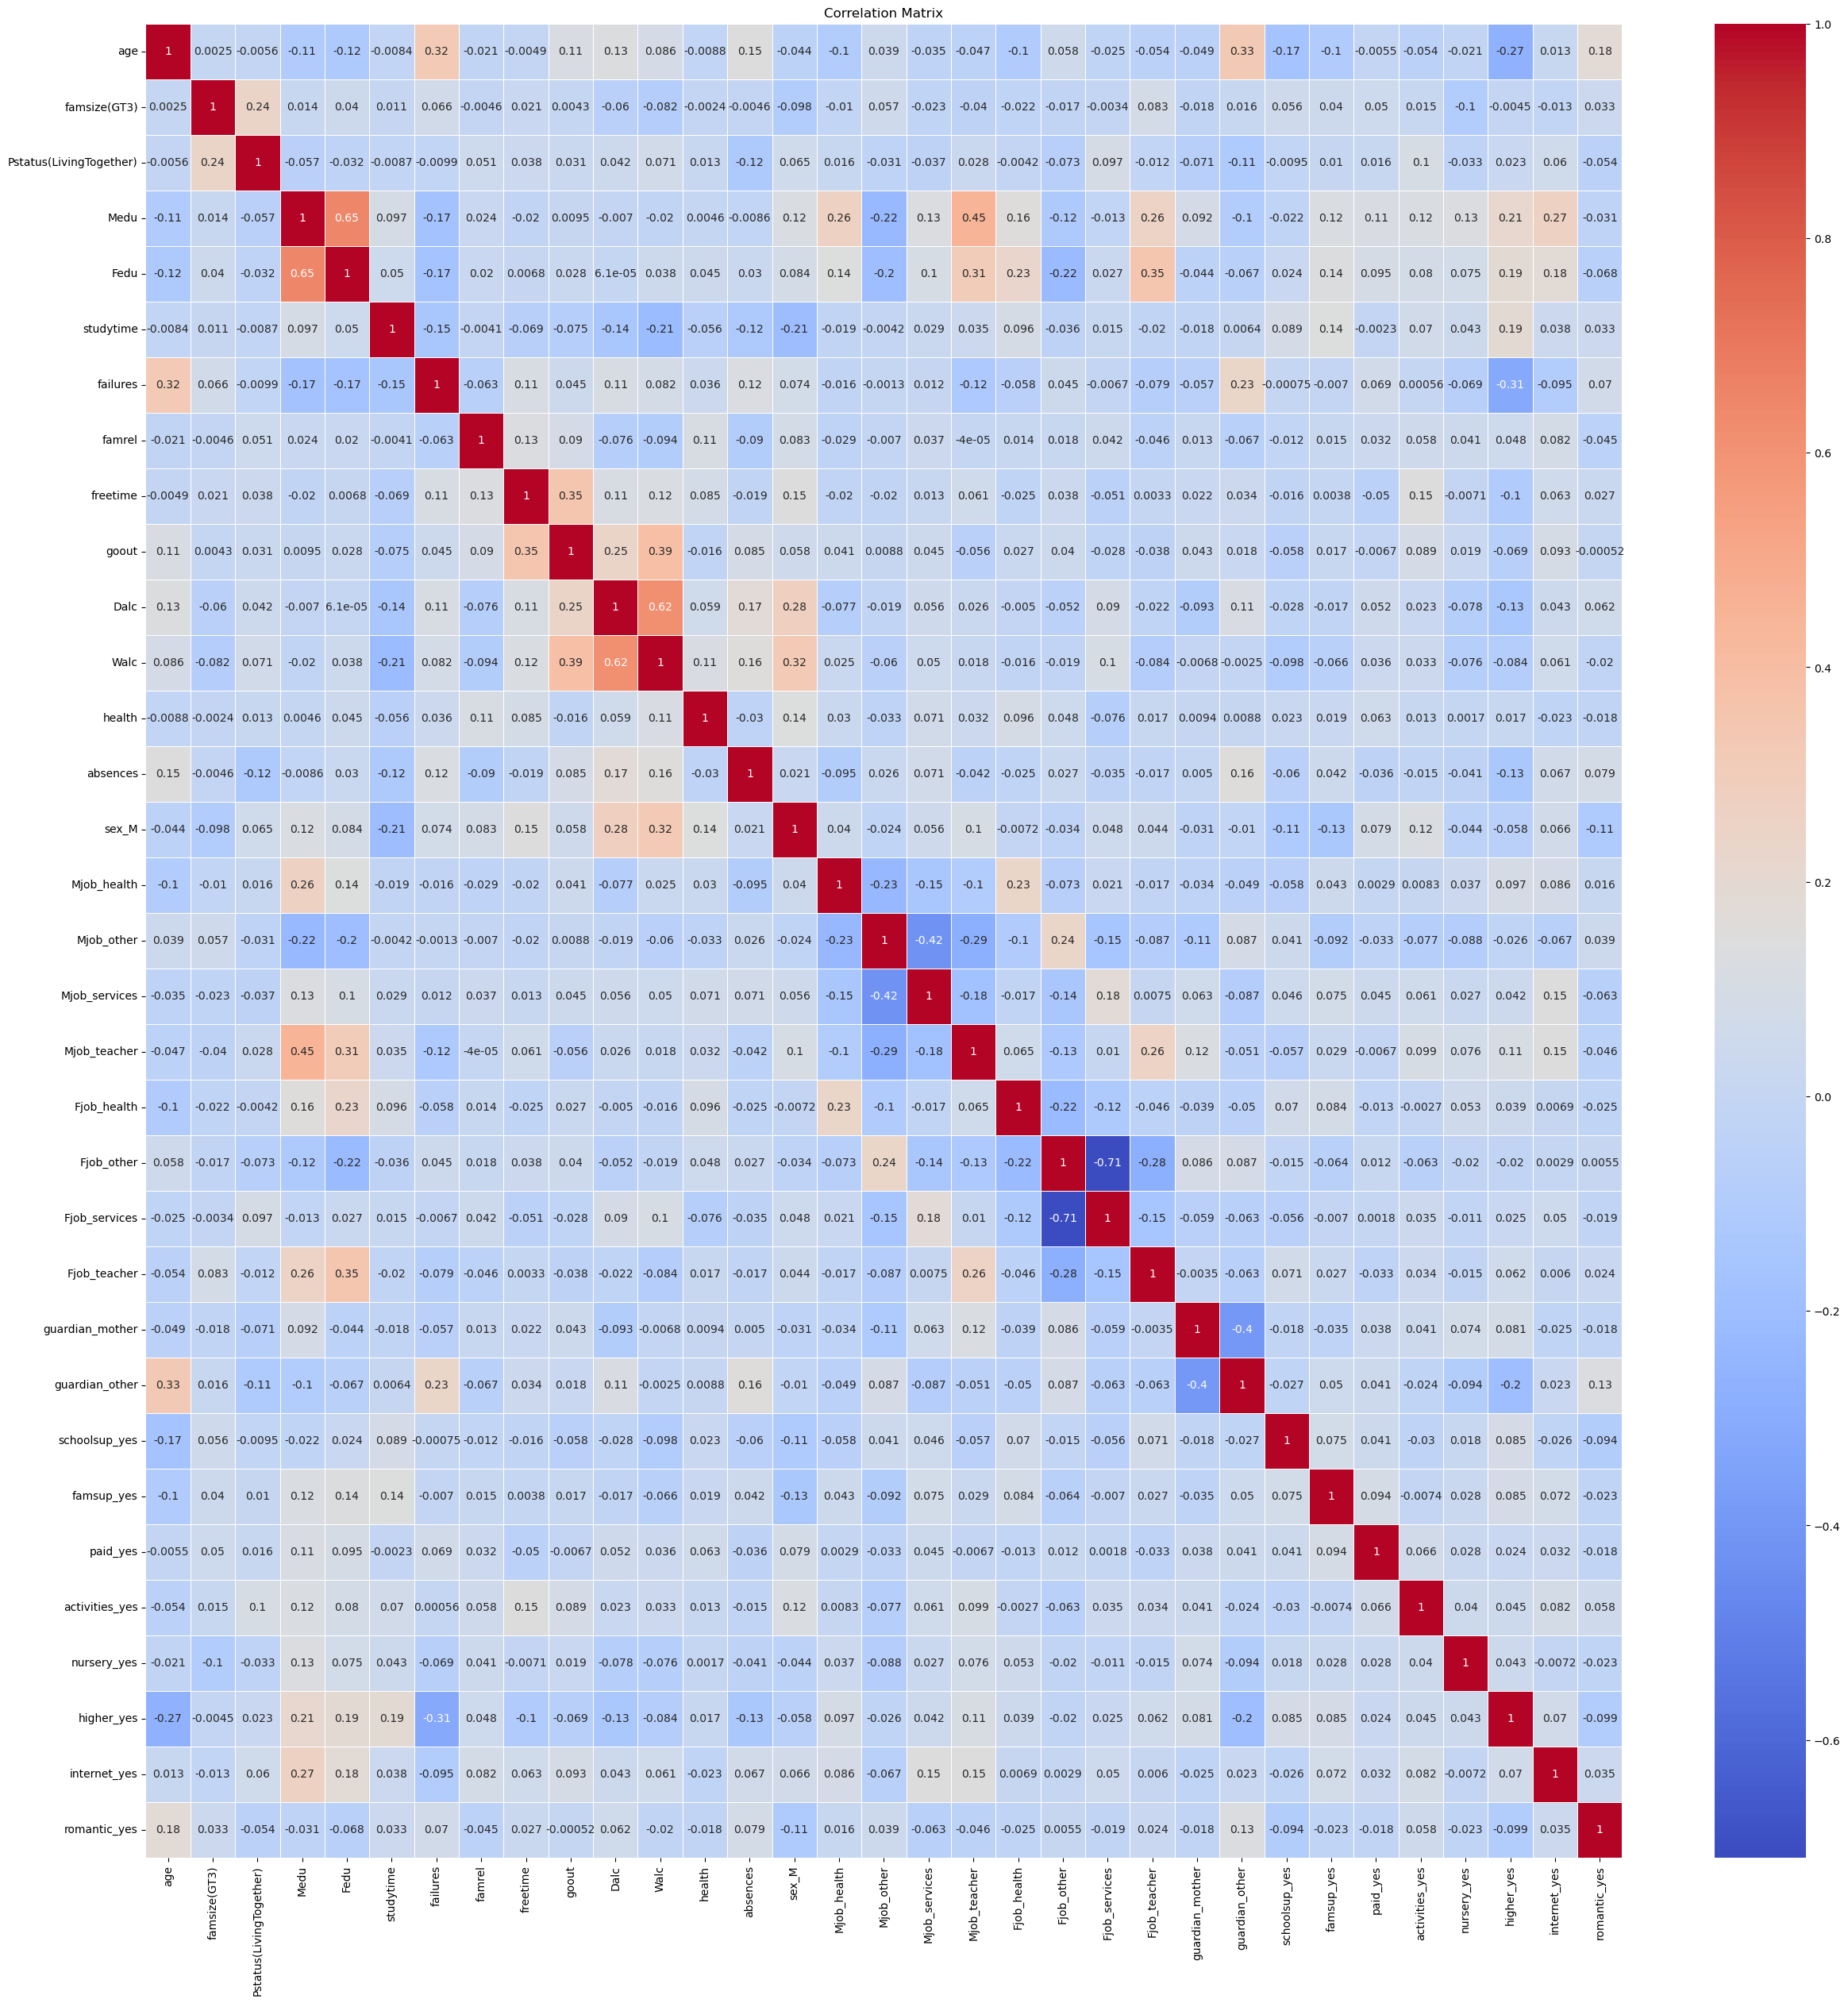

In [599]:
# Calculate the correlation matrix
corr_matrix = X.corr()

print(corr_matrix)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [600]:
X.head(20)

,age,famsize(GT3),Pstatus(LivingTogether),Medu,Fedu,studytime,failures,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,1,0,4,4,2,0,4,3,4,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,1,2,0,5,3,3,...,0,0,0,1,0,0,0,1,1,0
2,15,0,1,1,1,2,0,4,3,2,...,1,0,1,0,0,0,1,1,1,0
3,15,1,1,4,2,3,0,3,2,2,...,1,0,0,1,0,1,1,1,1,1
4,16,1,1,3,3,2,0,4,3,2,...,0,0,0,1,0,0,1,1,0,0
5,16,0,1,4,3,2,0,5,4,2,...,1,0,0,1,0,1,1,1,1,0
6,16,0,1,2,2,2,0,4,4,4,...,1,0,0,0,0,0,1,1,1,0
7,17,1,0,4,4,2,0,4,1,4,...,1,0,1,1,0,0,1,1,0,0
8,15,0,0,3,2,2,0,4,2,2,...,1,0,0,1,0,0,1,1,1,0
9,15,1,1,3,4,2,0,5,5,1,...,1,0,0,1,0,1,1,1,1,0


# IV. Modeling
Understand the relationship between alcohol usage, internet access and the grades of students.

In [601]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Use G3 as a regression target and G3 as a classification target
y_reg = y['G3']
y_class = y['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Split the data for regression and classification
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


# V. Evaluation

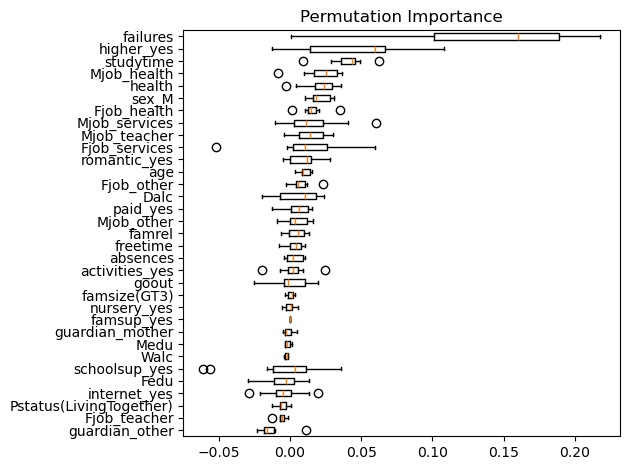

In [602]:
from sklearn.metrics import mean_absolute_error, r2_score

# Regression: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)

# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(regressor, X_test, y_test_reg, n_repeats=10, scoring="r2", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()



In [603]:

b0 = regressor.intercept_  # Intercept (constant term)
b1 = regressor.coef_[0]  # Coefficients for each feature (array)
print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)

y_pred_reg = regressor.predict(X_test)

print("MAE (Mean Absolute Error):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Intercept: 11.88, Coefficient: 0.1443
MAE (Mean Absolute Error): 2.0943127479680075
R² Score: 0.19453980680101712


In [604]:
from sklearn.metrics import accuracy_score, classification_report

# Classification: Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

y_pred_class = classifier.predict(X_test_class)
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        15
           1       0.90      0.97      0.94       115

    accuracy                           0.88       130
   macro avg       0.70      0.59      0.61       130
weighted avg       0.86      0.88      0.86       130



In [605]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True, max_samples=0.7, max_features=0.75)
randomForest.fit(X_train_class, y_train_class)

y_pred_randomForest = randomForest.predict(X_test_class)

print("Accuracy:", accuracy_score(y_test_class, y_pred_randomForest))
print(classification_report(y_test_class, y_pred_randomForest))


Accuracy: 0.8923076923076924
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.92      0.96      0.94       115

    accuracy                           0.89       130
   macro avg       0.73      0.68      0.70       130
weighted avg       0.88      0.89      0.88       130



# VI. Deployment / Conclusion
